# Kilometre Taşı Projesi 1: 🍔👁 Food Vision Big™

Önceki dizüstü bilgisayarda (transfer öğrenme bölümü 3: ölçeklendirme) Food Vision mini'yi oluşturduk: Food101 makalesinin orijinal sonuçlarını verilerin yalnızca %10'u ile geride geçen bir transfer öğrenme modeli.

Ama merak ediyor olabilirsiniz, tüm verileri kullanırsak ne olur?

Pekala, bu defterde öğreneceğimiz şey bu!

Food101 veri kümesindeki tüm verileri kullanarak Food Vision Big™'i oluşturacağız. https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

Evet. Tüm 75.750 eğitim görüntüsü ve 25.250 test görüntüsü.

Ve tahmin et ne oldu...

Bu sefer, %77.4 top-1 doğruluk elde etmek için 2-3 gün boyunca eğitilmiş bir Evrişimli Sinir Ağı kullanan 2016 tarihli bir makale olan DeepFood'u yenme hedefimiz var. https://www.researchgate.net/publication/304163308_DeepFood_Deep_Learning-Based_Food_Image_Recognition_for_Computer-Aided_Dietary_Assessment

🔑 Not: En iyi-1 doğruluğu, "model tarafından en yüksek softmax aktivasyon değeri çıktısı için doğruluk" anlamına gelir (çünkü softmax her sınıf için bir değer üretir, ancak ilk 1 yalnızca en yüksek olanın değerlendirildiği anlamına gelir). En iyi 5 doğruluğu, "model tarafından üretilen en iyi 5 softmax aktivasyon değeri için doğruluk" anlamına gelir, başka bir deyişle, gerçek etiket ilk 5 aktivasyon değerinde göründü mü? İlk 5 doğruluk puanları genellikle ilk 1'den belirgin şekilde daha yüksektir.

# Food Vision Big / Food Vision Mini

* Veri Kaynağı: Tensorflow Dataseti / Kaggle'ın ön işlenmiş dataseti
* Eğitim Data: 75750 fotoğraf / 7575 fotoğraf
* Test Data: 25250 fotoğraf ikisi de
* Karışık Değerlendirme: Evet / Hayır
* Veri Yükleme: Performanant tf.data API / TensorFlow pre-built function
* Hedef Sonuç: %77.4 https://arxiv.org/abs/1606.05675/ %50.76 https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf

Food Vision Big (bu dizüstü bilgisayar) ile Food Vision mini (önceki dizüstü bilgisayar) arasındaki farkı karşılaştıran tablo.

DeepFood gazetesini yenmeye çalışmanın yanı sıra, model eğitimimizin hızını önemli ölçüde artırmak için iki yöntem hakkında bilgi edineceğiz:

Ön alma

Karışık hassasiyetli eğitim

Ama bunlar hakkında daha sonra.


# Çalışma Kitabı İçeriği
* Verileri indirmek ve keşfetmek için TensorFlow Veri Kümelerini kullanma

* Verilerimiz için ön işleme işlevi oluşturma

* Modelleme için veri kümelerini toplu hale getirme ve hazırlama (veri kümelerimizin hızlı çalışmasını sağlar)

* Modelleme geri aramaları oluşturma

* Karışık hassas eğitim ayarlama

* Bir özellik çıkarma modeli oluşturma (bkz. transfer öğrenme bölüm 1: özellik çıkarma) https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb

* Özellik çıkarma modelinin ince ayarlanması (bkz. öğrenme bölümü 2: ince ayar) https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb

* TensorBoard'da eğitim sonuçlarını görüntüleme

# Kurs Materyalleri:
https://github.com/mrdbourke/tensorflow-deep-learning

# Orjinal Dosya
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/07_food_vision_milestone_project_1.ipynb

# GPU'yu kontrol et

Bu defter için farklı bir şey yapacağız.

Karışık hassasiyet eğitimi kullanacağız.

TensorFlow 2.4.0'da (yazma sırasında çok yeni bir özellik) karışık hassasiyet eğitimi tanıtıldı. https://blog.tensorflow.org/2020/12/whats-new-in-tensorflow-24.html

Karışık hassasiyetli eğitim ne işe yarar?

Karışık hassasiyet eğitimi, model eğitimini hızlandırmak için tek hassasiyet (float32) ve half-preicison (float16) veri türlerinin bir kombinasyonunu kullanır (modern GPU'larda 3 kat).

Bunun hakkında daha sonra konuşacağız, ancak bu arada daha fazla ayrıntı için karışık hassasiyetle ilgili TensorFlow belgelerini okuyabilirsiniz. https://www.tensorflow.org/guide/mixed_precision?hl=tr

Şimdilik, karışık hassasiyet eğitimini kullanmak istiyorsak ilerlemeden önce, Google Colab örneğimize güç veren GPU'nun (Google Colab kullanıyorsanız) uyumlu olduğundan emin olmamız gerekiyor.

Karışık hassasiyet eğitiminin çalışması için, 7.0+ bilgi işlem uyumluluğu puanına sahip bir GPU'ya erişmeniz gerekir.

Google Colab birkaç çeşit GPU sunar.

Bununla birlikte, bazıları karışık hassasiyet eğitimi ile uyumlu değildir.

Bu nedenle, Google Colab'da karışık hassasiyet eğitimine erişebildiğinizden emin olmak için Nvidia'nın geliştirici web sitesinde GPU hesaplama yetenek puanınızı kontrol edebilirsiniz. https://developer.nvidia.com/cuda-gpus#compute

Mayıs 2023 itibariyle, Google Colab'da bulunan ve karışık hassasiyet eğitimine izin veren GPU'lar şunlardır:

* NVIDIA A100 (Google Colab Pro ile kullanılabilir)

* NVIDIA Tesla T4

🔑 Not: GPU adınızı kontrol etmek için aşağıdaki hücreyi çalıştırabilir ve ardından karışık hassasiyet eğitimi kullanıp kullanmadığını görmek için NVIDIA'nın geliştirici sayfasındaki GPU listesiyle karşılaştırabilirsiniz.

In [ ]:
# Get GPU name
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-6841fe0b-d581-0860-f575-3cedb53563ba)


Karma hassasiyet eğitimi TensorFlow 2.4.0'da tanıtıldığından, en az TensorFlow 2.4.0+'a sahip olduğunuzdan emin olun.

Mixed precision: Model eğitiminde 16 ve 32 bit float değerlerinin kullanılması. Model daha hızlı çalışır. Bunu kullanmak için NVDIA T4 kullanılmalı. Burada tesla T4 olarak geçer. Tesla yoksa bu model yine çalışır ama yavaş çalışır.

GPU tipini değiştirmek için fabrika çalışa zamanını sıfırla seçeneği tıklanmalı. Tesla T4 görülene kadar denenmeli.

Yardımcı fonks. için github'da depolanan DCPI komut dosyası.

In [ ]:
# Note: As of May 2023, there have been some issues with TensorFlow versions 2.9-2.12
# with the following code.
# However, these seemed to have been fixed in version 2.13+.
# TensorFlow version 2.13 is available in tf-nightly as of May 2023 (will be default in Google Colab soon).
# Therefore, to prevent errors we'll install tf-nightly first.
# See more here: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/550

# Install tf-nightly (required until 2.13.0+ is the default in Google Colab)
!pip install -U -q tf-nightly

# Check TensorFlow version (should be minimum 2.4.0+ but 2.13.0+ is better)
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

TensorFlow version: 2.17.0-dev20240421
Notebook last run (end-to-end): 2024-04-21 19:44:56.810034


# Yardımcı işlevleri alın

Kurstaki önceki not defterlerinde bir dizi yardımcı işlev oluşturduk. Onları yeniden yazmak yerine (sıkıcı), helper_functions.py dosyasını GitHub deposundan içe aktaracağız.

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py

In [ ]:
# Get helper functions file
import os

if not os.path.exists("helper_functions.py"):
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
else:
    print("[INFO] 'helper_functions.py' already exists, skipping download.")

[INFO] 'helper_functions.py' already exists, skipping download.


In [ ]:
# Import series of helper functions for the notebook (we've created/used these in previous notebooks)
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

# Verileri İndirmek için TensorFlow Veri Kümelerini Kullanın

Önceki dizüstü bilgisayarlarda, gıda resimlerimizi (Food101 veri kümesinden) Google Storage'dan indirdik. https://www.kaggle.com/datasets/dansbecker/food-101

Ve bu, kendi veri kümeleriniz üzerinde çalışıyorsanız kullanabileceğiniz tipik bir iş akışıdır.

Ancak, veri kümelerini TensorFlow ile kullanıma hazır hale getirmenin başka bir yolu var.

Makine öğrenimi dünyasındaki en popüler veri kümelerinin çoğu için (genellikle kıyaslama olarak adlandırılır ve kullanılır), bunlara TensorFlow Veri Kümeleri (TFDS) aracılığıyla erişebilirsiniz. https://www.tensorflow.org/datasets/overview?hl=tr

TensorFlow Veri Kümeleri nedir?

Hazırlanmış ve kullanıma hazır makine öğrenimi veri kümeleri için bir yer.

Neden TensorFlow Veri Kümelerini kullanmalı?

* Verileri zaten Tensors'a yükleyin

* İyi kurulmuş veri kümeleri üzerinde uygulama

* Farklı veri yükleme teknikleriyle denemeler yapın (bu not defterinde kullanacağımız gibi)

* Yeni TensorFlow özelliklerini hızlı bir şekilde deneyin (karışık hassasiyet eğitimi gibi)

Neden TensorFlow Veri Kümelerini kullanmıyorsunuz?

* Veri kümeleri statiktir (real-world veri kümelerinizin yapacağı gibi değişmezler)

* Özel sorununuz için uygun olmayabilir (ancak deney yapmak için harika)

TensorFlow Datasets'i kullanmaya başlamak için tfds takma adı altında içe aktarabiliriz.

In [ ]:
# Get TensorFlow Datasets
import tensorflow_datasets as tfds

TensorFlow Veri Kümelerinde kullanılabilir tüm veri kümelerini bulmak için list_builders() yöntemini kullanabilirsiniz.

Bunu yaptıktan sonra, peşinde olduğumuz ("food101") mevcut olup olmadığını kontrol edebiliriz.

In [ ]:
# Get all available datasets in TFDS
datasets_list = tfds.list_builders()

# Set our target dataset and see if it exists
target_dataset = "food101"
print(f"'{target_dataset}' in TensorFlow Datasets: {target_dataset in datasets_list}")

'food101' in TensorFlow Datasets: True


Güzel! Aradığımız veri kümesi mevcut gibi görünüyor (çok daha fazla mevcut olduğunu unutmayın, ancak Food101'deyiz).

TFDS'den Food101 veri kümesine erişmek için tfds.load() yöntemini kullanabiliriz. https://www.tensorflow.org/datasets/api_docs/python/tfds/load

Özellikle, ne peşinde olduğumuzu bildirmek için birkaç parametre geçmemiz gerekecek:

* Isim (str) : hedef veri kümesi (örn. "food101")

* Bölme (liste, isteğe bağlı) : peşinde olduğumuz veri kümesinin hangi bölmeleri (örn. ["train", "validation"])

* Bölme parametresi oldukça zor. Daha fazla bilgi için belgelere bakın. https://github.com/tensorflow/datasets/blob/master/docs/splits.md

* Shuffle_files (bool) : indirmede dosyaları karıştırıp karıştırmamak, varsayılan olarak False

* As_supervised (bool) : Veri örneklerini demet formatında ((veri, etiket)) indirmek için doğru veya sözlük formatı için False

* With_info (bool) : Veri kümesi meta verilerini indirmek için doğru (etiketler, örnek sayısı, vb.)

🔑 Not: tfds.load() yönteminin çağrılması, download=True parametresi ayarlanmışsa (varsayılan) diske bir hedef veri kümesi indirmeye başlar. Bu veri kümesi 100GB+ olabilir, bu yüzden alanınız olduğundan emin olun.

tfds.load --> isimlendirilmiş datasetini tf.data.Dataset içerisine yükler.

food101 görüntüleri 5 gb.

Tensorflow Dataset (TFDS)
- Tensor formatındaki veriler yüklenir.
- Birçok problem türü için iyi hazırlanmış veri setleridir.
- Tutarlı bir veri kümesi üzerinde farklı model tekniklerini uygulayabilirsiniz.

Ne için uygun değildir?
- Veri setinin statik olduğu durumlar (gerçek dünya veri setleri gibi değişmez).

In [ ]:
# Load in the data (takes about 5-6 minutes in Google Colab)
(train_data, test_data), ds_info = tfds.load(name="food101", # target dataset to get from TFDS
                                             split=["train", "validation"], # what splits of data should we get? note: not all datasets have train, valid, test
                                             shuffle_files=True, # shuffle files on download?
                                             as_supervised=True, # download data in tuple format (sample, label), e.g. (image, label)
                                             with_info=True) # include dataset metadata? if so, tfds.load() returns tuple (data, ds_info)

Harika! Birkaç dakika indirdikten sonra, artık modelleme için hazır olan tüm Food101 veri kümesine (tensör formatında) erişebiliyoruz.

Şimdi sınıf adlarından başlayarak veri kümemizden biraz bilgi alalım.

Bir TensorFlow Datasets veri kümesinden sınıf adlarını almak, "dataset_info" değişkenini indirmeyi gerektirir (tfds.load() yönteminde as_supervised=True parametresini kullanarak, not: bu yalnızca TFDS'deki denetimli veri kümeleri için çalışacaktır).

Dataset_info.features özniteliğini kullanarak ve "label" anahtarının names özniteliğine erişerek belirli bir veri kümesinin sınıf adlarına erişebiliriz.

In [ ]:
# Features of Food101 TFDS
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
# Get class names
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

# TensorFlow Veri Kümelerinden Food101 verilerini keşfetme

Şimdi TensorFlow Datasets'ten Food101 veri setini indirdik, herhangi bir iyi veri gezgininin yapması gerekenleri yapmaya ne dersiniz?

Başka bir deyişle, "görselleştir, görselleştir, görselleştir".

Veri kümemiz hakkında birkaç ayrıntı öğrenelim:

* Giriş verilerimizin şekli (görüntü tensörleri)

* Giriş verilerimizin veri tipi

* Giriş verilerimizin etiketleri nasıl görünüyor (örneğin, tek sıcak kodlu ve etiket kodlu)

* Etiketler sınıf adlarıyla eşleşiyor mu?

Bunu yapmak için, eğitim verilerinden bir örnek alalım (.take() yöntemini kullanarak) ve onu keşfedelim. https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take

In [ ]:
# Take one sample off the training data
train_one_sample = train_data.take(1) # samples are in format (image_tensor, label)

Yukarıdaki tfds.load() yöntemimizde as_supervised=True parametresini kullandığımız için, veri örnekleri demet biçimi yapısında (veri, etiket) veya bizim durumumuzda (image_tensor, etiket) gelir.

In [ ]:
# What does one sample of our training data look like?
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

Tek eğitim örneğimizi gözden geçirelim ve image_tensor ve etiketten biraz bilgi alalım.

In [ ]:
# Output info about our training sample
for image, label in train_one_sample:
  print(f"""
  Image shape: {image.shape}
  Image dtype: {image.dtype}
  Target class from Food101 (tensor form): {label}
  Class name (str form): {class_names[label.numpy()]}
        """)


  Image shape: (512, 384, 3)
  Image dtype: <dtype: 'uint8'>
  Target class from Food101 (tensor form): 19
  Class name (str form): chicken_quesadilla
        


One hot encoding formatında olsaydı şekiller [0,0, 1, 0 .. 0] gibi görünürdü.

Yukarıdaki tfds.load() yöntemimizde shuffle_files=True parametresini ayarladığımız için, hücreyi birkaç kez çalıştırmak her seferinde farklı bir sonuç verecektir.

Bunları kontrol ederek, bazı görüntülerin farklı şekillere sahip olduğunu fark edebilirsiniz, örneğin (512, 342, 3) ve (512, 512, 3) (yükseklik, genişlik, renk_kanalları).

TFDS'nin Food101 veri kümesindeki görüntü tensörlerinden birinin neye benzediğini görelim.

In [ ]:
# What does an image tensor from TFDS's Food101 look like?
image

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  7,   7,   5],
        [ 11,  11,   9],
        [ 14,  14,  12]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   3],
        [  8,   8,   6],
        [ 11,  11,   9]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   3],
        [  7,   7,   5],
        [ 10,  10,   8]],

       ...,

       [[ 72,  75,  82],
        [ 55,  58,  65],
        [ 43,  46,  51],
        ...,
        [105, 113, 115],
        [108, 113, 116],
        [135, 140, 143]],

       [[ 75,  80,  86],
        [ 61,  66,  72],
        [ 51,  54,  59],
        ...,
        [102, 107, 110],
        [ 75,  79,  82],
        [111, 115, 118]],

       [[ 94,  99, 105],
        [ 81,  86,  92],
        [ 71,  74,  79],
        ...,
        [151, 156, 15

In [ ]:
# What are the min and max values?
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

Pekala, görüntü tensörlerimizin değerleri 0 ile 255 arasında (standart kırmızı, yeşil, mavi renk değerleri) ve değerler veri tipi birim8 gibi görünüyor.

Bunları bir sinir ağına geçirmeden önce önceden işlememiz gerekebilir. Ama bunu daha sonra halledeceğiz.

Bu arada, bir görüntü örneği çizebilir miyiz bakalım.

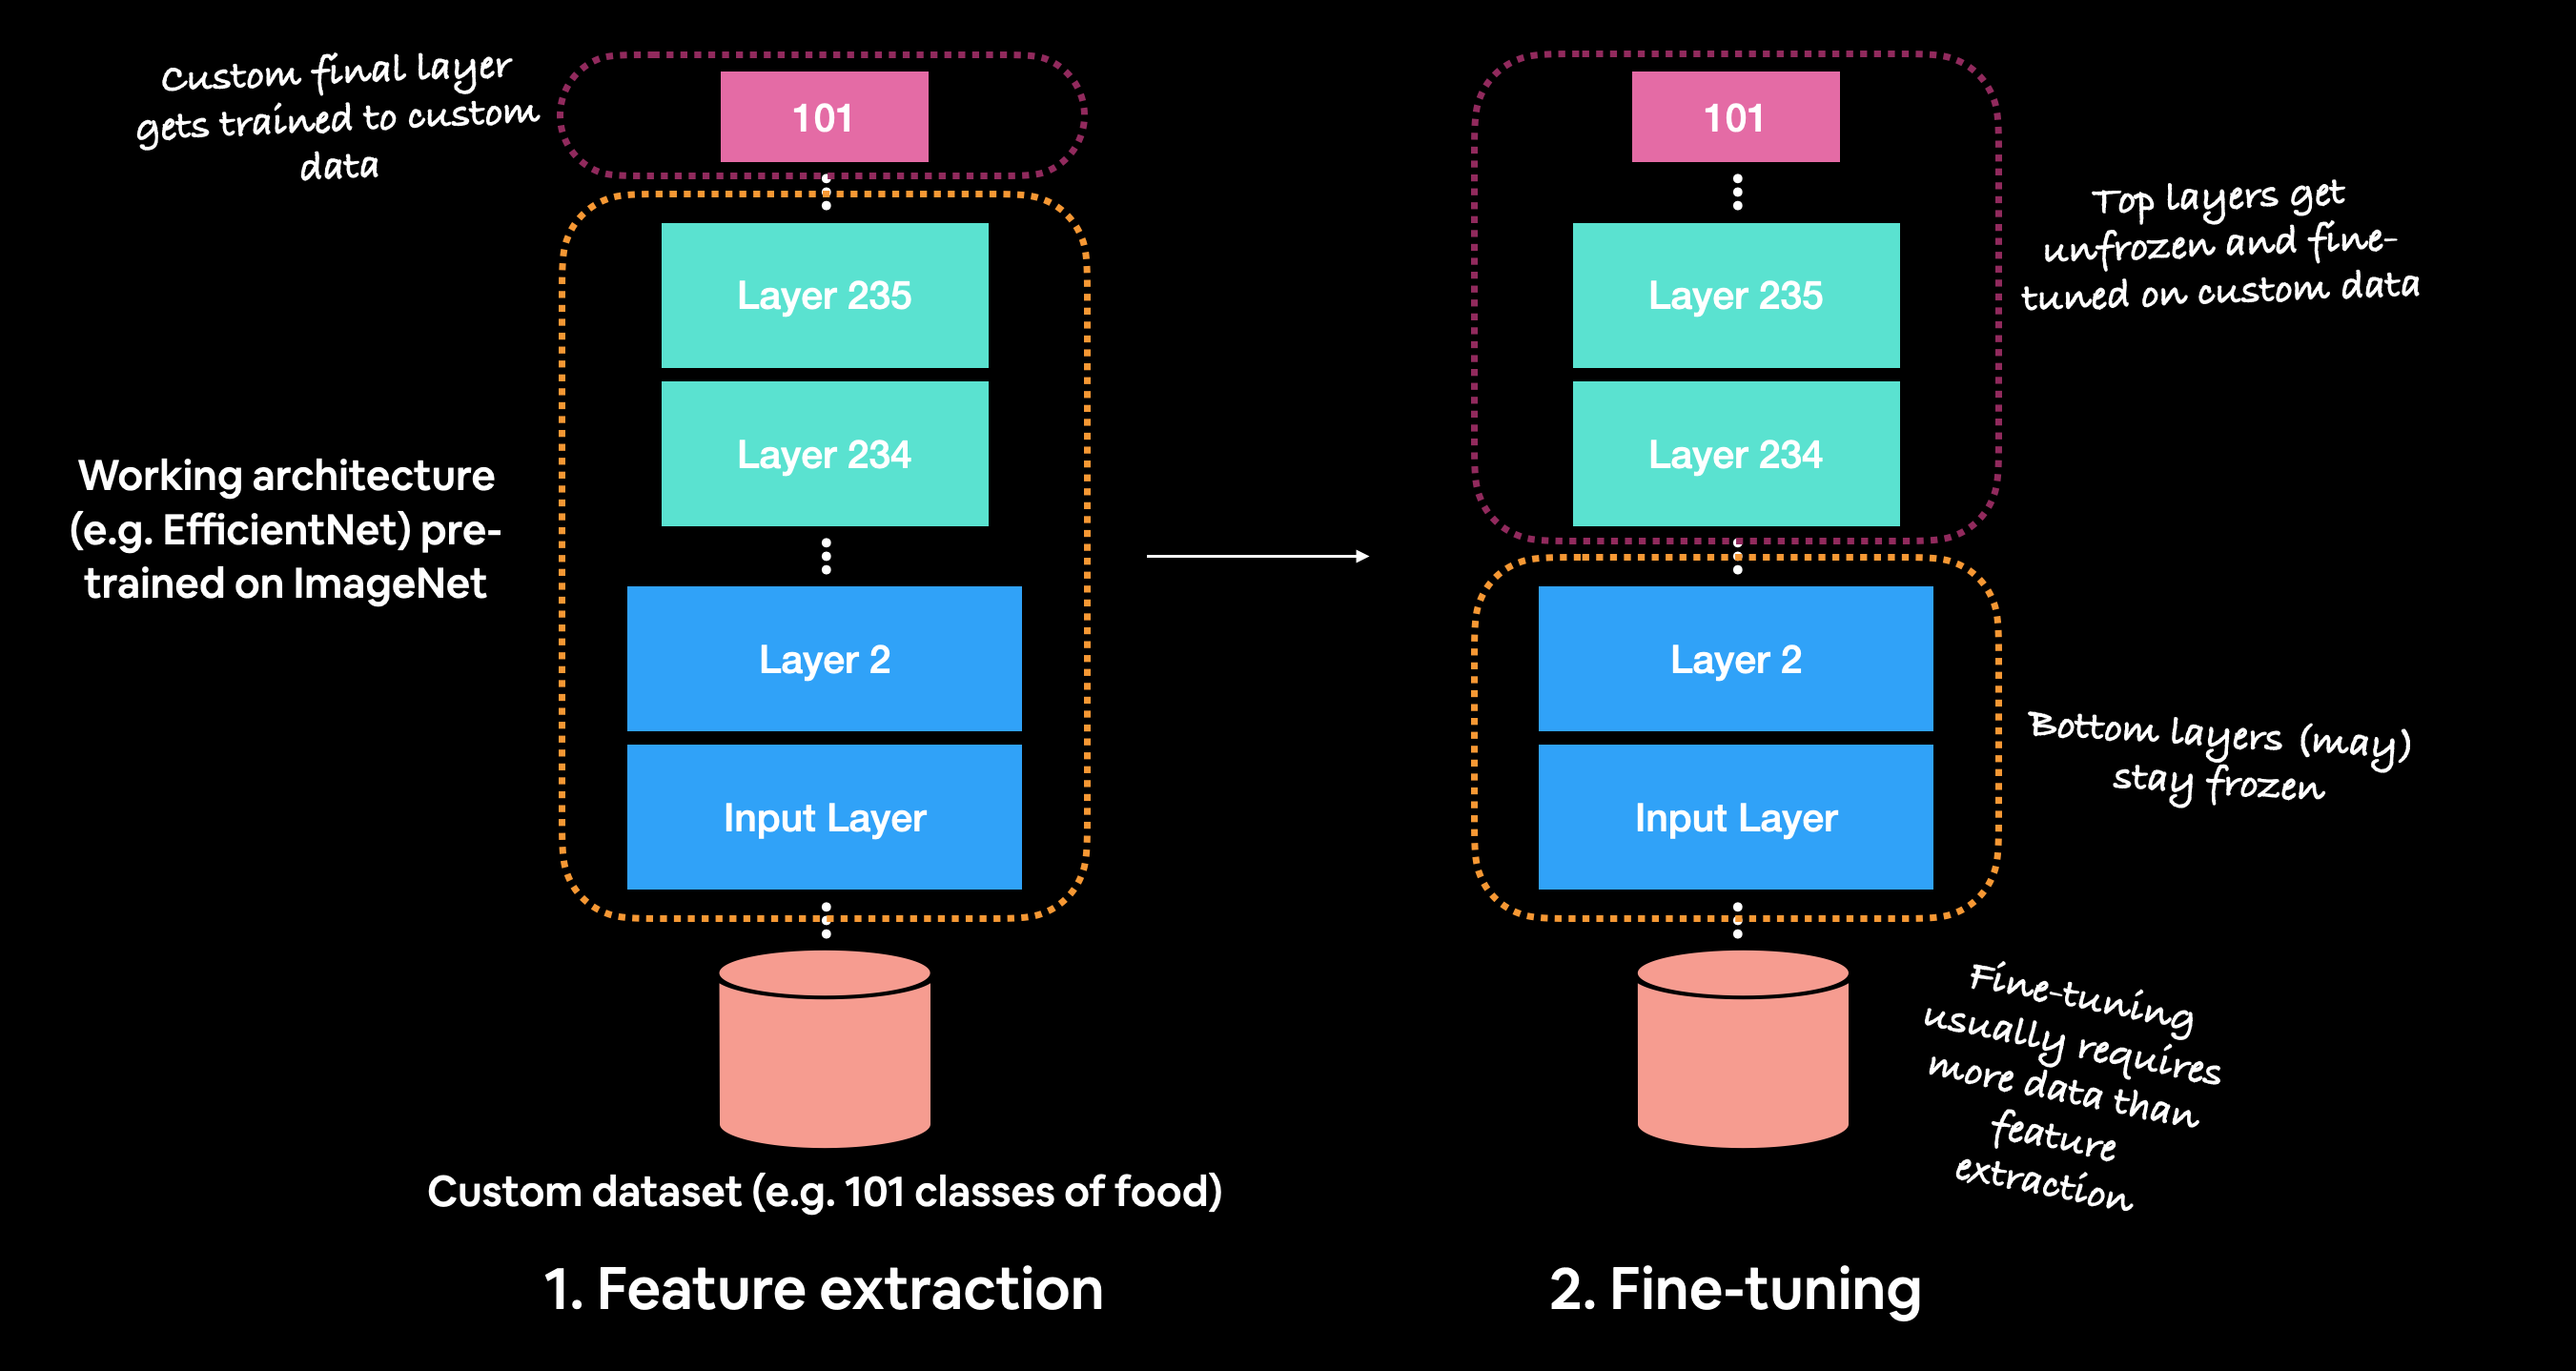

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/07-feature-extraction-then-fine-tune.png"

# Resmi göster
display(Image(image_url))


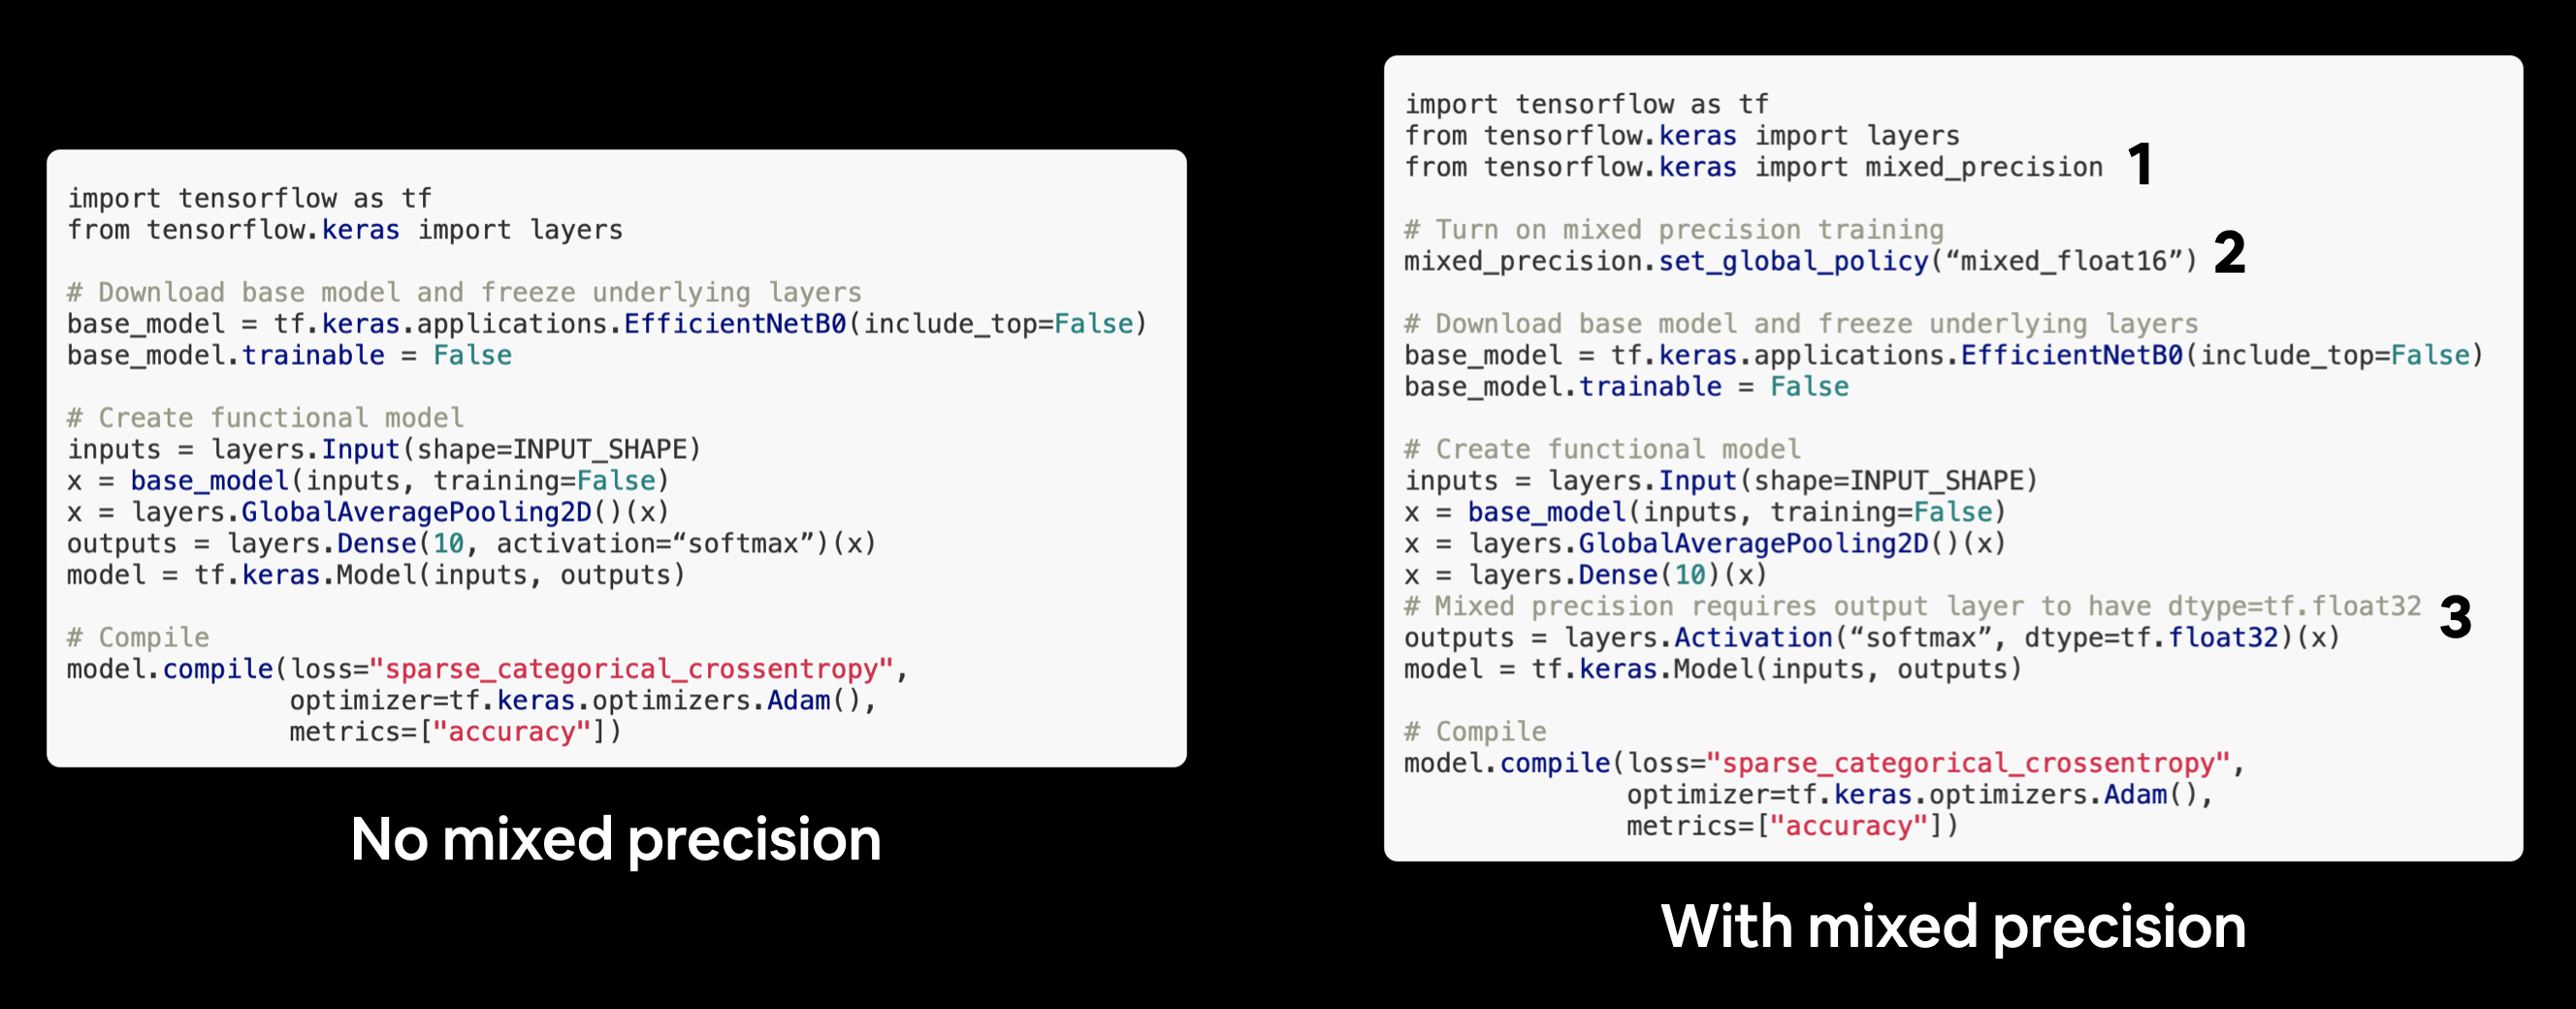

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/07-mixed-precision-code-before-and-after.png"

# Resmi göster
display(Image(image_url))


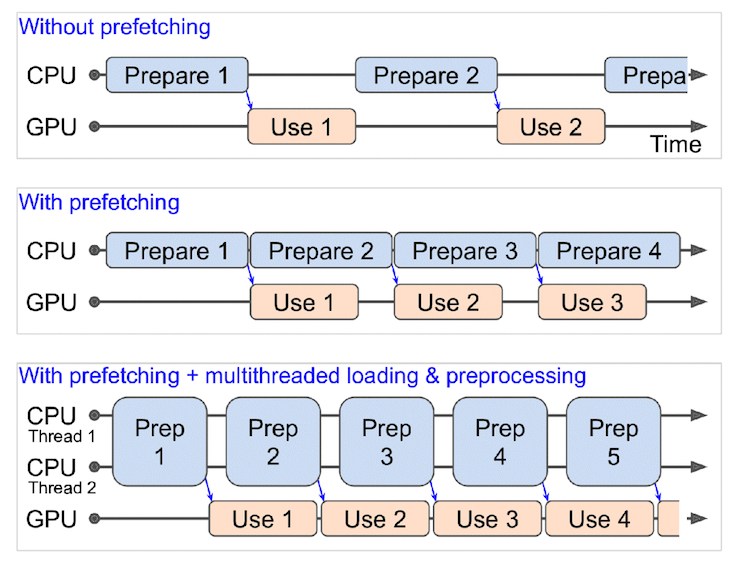

In [ ]:
from IPython.display import display, Image

# Resmin URL'si
image_url = "https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/images/07-prefetching-from-hands-on-ml.png"

# Resmi göster
display(Image(image_url))


# TensorFlow Datasets'ten bir görüntü çizin

Görüntü tensörlerimizi tensör formatında gördük, şimdi gerçekten sloganımıza bağlı kalalım.

"Görselleştirin, görselleştirin, görselleştirin!"

Matplotlib.pyplot.imshow() kullanarak görüntü örneklerinden birini çizelim ve başlığı hedef sınıf adına ayarlayalım. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

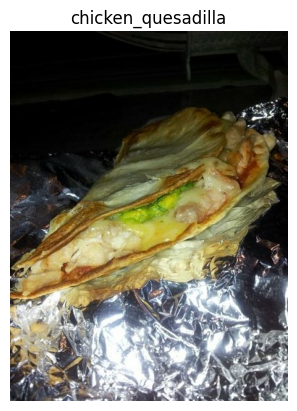

In [ ]:
# Plot an image tensor
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()]) # add title to image by indexing on class_names list
plt.axis(False);

Tamam, TFDS'den aldığımız Food101 verileri, önceki dizüstü bilgisayarlarda kullandığımız veri kümelerine benziyor gibi görünüyor.

Şimdi onu önceden işleyelim ve bir sinir ağı ile kullanıma hazır hale getirelim.

Nöral ağlar batch, normalleştirilmiş vb formlarda iyi performans gösterir. Tensörflow dataseti böyle değildir. Bunu sağlamak için preprocessing fonks. yazmalısın ve veriler ile eşlemelisin.



# Verilerimiz için ön işleme işlevleri oluşturun

Önceki not defterlerinde, görüntülerimiz klasör biçimindeyken, bunları yüklemek için tf.keras.utils.image_dataset_from_directory() yöntemini kullandık. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

Bunu yapmak, verilerimizin modellerimizle kullanılmaya hazır bir formata yüklendiği anlamına geliyordu.

Ancak, TensorFlow Datasets'ten verileri indirdiğimiz için, modellemeye hazır olmadan önce atmamız gereken birkaç ön işleme adımı var.

Daha spesifik olarak, verilerimiz şu anda:

* Uint8 veri türünde

* Tüm farklı boyutlu tensörlerden (farklı boyutlu görüntüler) içerir

* Ölçeklendirilmemiş (piksel değerleri 0 ve 255 arasındadır)

Oysa veriler gibi modeller:

* Float32 veri türünde

* Aynı boyuttaki tüm tensörlere sahip olun (toplu tensörler tüm tensörlerin aynı şekle sahip olmasını gerektirir, örn. (224, 224, 3))

* Ölçekli (0 ve 1 arasındaki değerler), normalize olarak da adlandırılır

Bunlarla ilgilenmek için bir preprocess_img() işlevi oluşturacağız:

* Tf.image.resize() kullanarak bir giriş görüntüsü tensörünü belirli bir boyuta yeniden boyutlandırır https://www.tensorflow.org/api_docs/python/tf/image/resize

* Tf.cast() kullanarak bir giriş görüntüsü tensörünün mevcut veri türünü tf.float32'ye dönüştürür https://www.tensorflow.org/api_docs/python/tf/cast

🔑 Not: tf.keras.applications.efficientnet'teki (kullanacağımız şey) önceden eğitilmiş EfficientNetBX modelleri yerleşik olarak yeniden ölçeklendirmeye sahiptir. Ancak diğer birçok model mimarisi için verilerinizi yeniden ölçeklendirmek isteyeceksiniz (örneğin, değerlerini 0 ve 1 arasında alın). Bu, "preprocess_img()" işlevinizin içine (aşağıdaki gibi) veya modelinizin içine bir tf.keras.layers.Rescaling katmanı olarak dahil edilebilir.

* https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet
* https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling

Yani fonks. şunları yapabilmeli;
* Görüntülerin hepsini aynı ölçüde yeniden şekillendirmeli.
* Görüntülerin dtype'sını uint8'den float 32'ye dönüştürmeli.

Bir etiketi almak zorunda olmasının nedeni, şu anda verilerimizin görüntü etiketi biçiminde olmasıdır.

Tüm resimlerin 512 veya 300 olmasını istiyorsan hedef şeklini 224'ten bu rakamlara da çekebilirsin. Genellikle 8'in katlarını gpu iyi hesaplar.

tf.image.resize docstring'e bakarsan (image, imagze size, method = resizemethod.bilinear vs...var. Yani önce görüntü, şekli..

Aşağısı için image = image/255. yapmana gerek yok. EfficientNetBX modelinde buna gerek yok (tf.keras.application). Farklı bir model kullanıyor olsaydık yapardık.



In [ ]:
# Make a function for preprocessing images
def preprocess_img(image, label, img_shape=224):
    """
    Converts image datatype from 'uint8' -> 'float32' and reshapes image to
    [img_shape, img_shape, color_channels]
    """
    image = tf.image.resize(image, [img_shape, img_shape]) # reshape to img_shape
    return tf.cast(image, tf.float32), label # return (float32_image, label) tuple

Yukarıdaki preprocess_img() işlevimiz, veri kümemiz şu anda demet yapısında (görüntü, etiket) olduğu için görüntü ve etiketi girdi olarak alır (etikete hiçbir şey yapmasa da).

Fonksiyonumuzu bir hedef görüntü üzerinde deneyelim. Tupple formatına döndürür.

Sadece 2 dizini aldık, neye benzediğini görmek için.

In [ ]:
# Preprocess a single sample image and check the outputs
preprocessed_img = preprocess_img(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 7  7  5]
  [11 11  9]
  [14 14 12]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 5  5  3]
  [ 8  8  6]
  [11 11  9]]]...,
Shape: (512, 384, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 7.7907934  7.7907934  5.7907934]
  [ 5.714286   5.714286   3.7142856]
  [10.999987  10.999987   8.999987 ]]

 [[ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  [ 0.         0.         0.       ]
  ...
  [ 6.770399   6.770399   4.770399 ]
  [ 6.790833   6.790833   4.790833 ]
  [10.1887665 10.1887665  8.1887665]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


Mükemmel! Preprocess_img() işlevimiz beklendiği gibi çalışıyor gibi görünüyor.

Giriş görüntüsü uint8'den float32'ye dönüştürülür ve mevcut şeklinden (224, 224, 3) yeniden şekillenir.

Nasıl görünüyor?

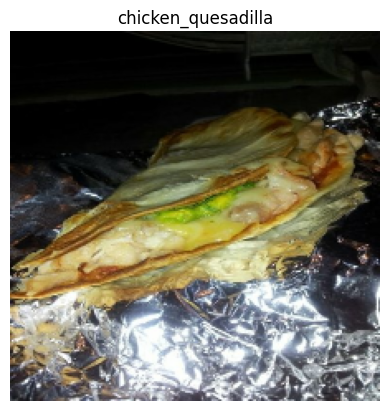

In [ ]:
# We can still plot our preprocessed image as long as we
# divide by 255 (for matplotlib capatibility)
plt.imshow(preprocessed_img/255.)
plt.title(class_names[label])
plt.axis(False);

# Veri kümelerini toplu olarak hazırla ve hazırla

Verilerimizi modellemeden önce, onu gruplara dönüştürmemiz gerekiyor.

Neden?

Çünkü gruplar üzerinde bilgi işlem bellek açısından verimlidir.

Verilerimizi 101.000 görüntü tensörü ve etiketten (eğitme ve test birleştirilmiş) 32 görüntü ve etiket çiftinden oluşan gruplara dönüştürüyoruz, böylece GPU'muzun belleğine sığmasını sağlıyoruz.

Bunu etkili bir şekilde yapmak için tf.data API'sinden bir dizi yöntemden yararlanacağız.

📖 Kaynak: Verileri mümkün olan en performanslı şekilde yüklemek için, tf.data API ile daha iyi performans üzerine TensorFlow docuemntation'a bakın. https://www.tensorflow.org/guide/data_performance?hl=tr

# Özellikle, şunları kullanacağız:

* Map() - önceden tanımlanmış bir işlevi hedef veri kümesine eşler (örn. preprocess_img() görüntü tensörlerimize) https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map

* Shuffle() - buffer_size'e kadar bir hedef veri kümesinin öğelerini rastgele karıştırır (ideal olarak, buffer_size veri kümesinin boyutuna eşittir, ancak bunun bellek üzerinde etkileri olabilir) https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle

* Batch() - hedef veri kümesinin öğelerini gruplara dönüştürür (batch_size parametresi ile tanımlanan boyut) https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch

* Prefetch() - diğer veri grupları hesaplanırken sonraki veri gruplarını hazırlar (veri yükleme hızını iyileştirir ancak bellek maliyeti) https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch

* Ekstra: cache() - önbellekler (daha sonrası için kaydeder) öğeleri bir hedef veri kümesindeki öğeler, yükleme süresinden tasarruf sağlar (yalnızca veri kümeniz belleğe sığacak kadar küçükse çalışır, standart Colab örnekleri yalnızca 12 GB belleğe sahiptir) https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache

# Dikkat edilmesi gerekenler:

* Farklı şekillerdeki tensörleri toplu olamaz (örneğin, farklı görüntü boyutları, önce görüntüleri yeniden şekillendirmeniz gerekir, dolayısıyla preprocess_img() işlevimiz)

* Shuffle() ilettiğiniz sayının bir tamponunu karıştırılır, ideal olarak bu sayı eğitim setinizdeki tüm örnekler olacaktır, ancak eğitim setiniz büyükse, bu arabellek belleğe sığmayabilir (1000 veya 10000 gibi oldukça büyük bir sayı genellikle karıştırma için yeterlidir)

* Mevcut num_parallel_calls parametresine sahip yöntemler için (map() gibi), bunu ayarlamak tonum_parallel_calls=tf.data.AUTOTUNE ön işlemeyi paralelleştirecek ve hızı önemli ölçüde artıracaktır.

* Veri kümeniz belleğe sığmadığı sürece cache() kullanılamıyor

Yukarıdakiler çok fazla. Ama aşağıda kodladıktan sonra, mantıklı olmaya başlayacak.

İşleri şu sırayla gözden geçireceğiz:

Orijinal veri kümesi (örn. train_data) -> map() -> shuffle() -> batch ->() prefetch() -> PrefetchDataset

Bu demek gibi,

"Hey, bu ön işleme işlevini eğitim veri kümemiz arasında haritalayın, ardından bunları bir araya getirmeden önce bir dizi öğeyi karıştırın ve model mevcut partiye bakarken yeni gruplar (ön yükleme) hazırladığınızdan emin olun".

map_func --> yapacağı şey tüm örnekleri alır ve ona verdiğimiz belirli bir işlevi uygular. Buradaki işlevimiz görüntü önişleme.

Veri seti tupple formatında image, label. Sadece map_func yazarsak etiket kaçırılır ve eksik olur. Dolayısıyla paralelleştireceğiz Autotune ile. böylece tensör akışı, kullandığı işlev sayısını otomatik olarak ayarlar. Yani varsayılan olarak sadece bu işlem kullanılır. Çok fazla işlem var. Çok fazla örnek olduğu için verileri eşlemekte (map) bunu kullanmak iş kolaylaştırır. Autotune olmadan tek fpu chip kullanır ama onu yazdığında model daha hızlanır.

Yukarıda shuffle kullanmıştık. Aşağıda tekrar kullanmamızın nedeni sadece güvende olmak için, hiçbir ağımızın hiçbir şey öğrenmemesi için tekrar karıştıracağız.

buffer_size --> tek seferde kaç öğenin karıştırılacağıdır. Sahip olduğunuz bellek miktarına bağlı olarak, GPU'nuz veya CPU'nuz veya çalıştırmanız mümkün olmayabilir tüm eğitim veri örneklerini bellekte saklamak için. Yeterli hafızanız varsa, eğitim verilerinin uzunluğuna gönderebilirsiniz.
Ancak, google colab için buna gerek yok.

prefetch --> Bir grupta bilgi işlem yaparken veya kalıpları bulurken GPU'daki eğitim verilerinden bu gruptaki başka bir partiyi hazırlayın (batch).

Normalde test_data kodunun sonuna .cache eklenir. Bu datasette (veri kümelerinde) herhangi bir ön işleme işleviyle karşılaşırsak bunu hafızada saklama işlemi yapar. Veri kümen Ram'ine uyarsa cache çalışır.

In [ ]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

Ve şimdi hazırlanan veri kümelerimizin neye benzediğini kontrol edelim.

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

Mükemmel! Görünüşe göre verilerimiz artık (tf.float32, tf.int64) veri türleriyle (görüntü, etiket) tutples'ta, sadece modelimizin peşinde olduğu gibi görünüyor.

🔑 Not: Veri kümelerinizin sonunda prefetch() yöntemini çağırmadan kaçabilirsiniz, ancak bir model oluştururken muhtemelen önemli ölçüde daha düşük veri yükleme hızları görürsünüz. Bu nedenle, veri kümesi giriş boru hatlarınızın çoğu prefecth() çağrısıyla sona ermelidir. https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch

# Modelleme geri aramaları oluşturun

Büyük miktarda veri üzerinde eğitim alacağımızdan ve eğitim uzun zaman alabileceğinden, bazı modelleme geri aramaları ayarlamak iyi bir fikirdir, böylece modelimizin eğitim günlüklerinin izlenmesi ve modelimizin çeşitli eğitim kilometre taşlarından sonra kontrol noktası (kaydedilmesi) gibi şeylerden emin oluruz.

Bunların her birini yapmak için aşağıdaki geri aramaları kullanacağız:

* tf.keras.callbacks.TensorBoard() - daha sonra inceleyebilmemiz için modelimizin eğitim geçmişini takip etmemizi sağlar (not: bu geri aramayı helper_functions.py'den create_tensorboard_callback() olarak içe aktarmadan önce oluşturduk) https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

* tf.keras.callbacks.ModelCheckpoint() - modelimizin ilerlemesini çeşitli aralıklarla kaydeder, böylece onu yükleyebilir ve daha sonra yeniden eğitmek zorunda kalmadan yeniden kullanabiliriz https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

  * Kontrol noktası da yararlıdır, böylece modelimizi belirli bir çağda ince ayar yapmaya başlayabilir ve ince ayar hiçbir fayda sağlamazsa önceki bir duruma geri dönebiliriz.

- Tensorboard geri aramaları ile günlük sonuçlar kaydedilebilir ve sonrasında bu görselleştirilebilir.
- Modelcheckpoint geri araması, feature extraction (özellik çıkarımı) sonrası model ilerlemesi kaydedilir.
- Checkpoint_path ile weights kurtarırız. Çünkü ağırlıkları kaydetmek modelleri kaydetmekten daha hızlıdır.
- save_best_only true yaparak en yüksek doğrulamaya sahip olan en iyi model kaydedilir.
- save_weight_only ile sadece ağırlıkları kaydetmek daha hızlı.

In [ ]:
# Create TensorBoard callback (already have "create_tensorboard_callback()" from a previous notebook)
from helper_functions import create_tensorboard_callback

# Create ModelCheckpoint callback to save model's progress
checkpoint_path = "model_checkpoints/cp.ckpt.weights.h5" # saving weights requires ".ckpt" extension
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor="val_accuracy", # save the model weights with best validation accuracy
                                                      save_best_only=True, # only save the best weights
                                                      save_weights_only=True, # only save model weights (not whole model)
                                                      verbose=0) # don't print out whether or not model is being saved

# Karışık hassas eğitim kurulumu

Yukarıda karışık hassasiyet eğitimine değindik.

Ancak, tam olarak açıklamadık.

Normalde, TensorFlow'daki tensörler varsayılan olarak float32 veri türünü kullanır (aksi belirtilmedikçe).

Bilgisayar bilimlerinde float32, tek hassasiyetli kayan nokta formatı olarak da bilinir. 32, bilgisayar belleğinde genellikle 32 bit kapladığı anlamına gelir. https://en.wikipedia.org/wiki/Single-precision_floating-point_format

GPU'nuzun sınırlı bir belleği vardır, bu nedenle aynı anda yalnızca bir dizi float32 tensörünü işleyebilir.

Karışık hassasiyetli eğitimin devreye girdiği yer burasıdır.

Karışık hassasiyet eğitimi, GPU'nuzun belleğini daha iyi kullanmak için float16 ve float32 tensörlerinin bir karışımını kullanmayı içerir.

Float16'nın ne anlama geldiğini tahmin edebilir misiniz?

Float32'nin tek hassasiyetli kayan nokta anlamına geldiğini düşündüyseniz, float16'nın yarım hassasiyetli kayan nokta biçimi anlamına geldiğini tahmin etmiş olabilirsiniz. Ve eğer yaptıysan, haklısın! Ve değilse, sorun yok, şimdi biliyorsun. https://en.wikipedia.org/wiki/Half-precision_floating-point_format

Float16 formatındaki tensörler için, her öğe bilgisayar belleğinde 16 bit kaplar.

Peki, bu bizi nerede bırakıyor?

Daha önce de belirtildiği gibi, karışık hassasiyet eğitimi kullanırken, modeliniz mümkün olduğunda daha az bellek kullanmak ve daha hızlı çalışmak için float32 ve float16 veri türlerini kullanacaktır (tensör başına daha az bellek kullanmak, aynı anda daha fazla tensörün hesaplanabileceği anlamına gelir).

Sonuç olarak, karma hassasiyet eğitimi kullanmak, modern GPU'larda (7.0+ işlem yeteneği puanına sahip olanlar) performansınızı 3 kata kadar artırabilir.

Daha ayrıntılı bir açıklama için, TensorFlow karışık hassasiyet kılavuzunu okumanızı tavsiye ederim (en azından özeti kontrol etmenizi şiddetle tavsiye ederim). https://www.tensorflow.org/guide/mixed_precision?hl=tr

Karışık hassasiyet eğitimi float32 ve float16 veri türlerinin bir kombinasyonunu kullandığından, modern GPU'larda 3 kata kadar hızlanma görebilirsiniz.

🔑 Not: GPU'nuzun puanı 7.0+'ın üzerinde değilse (örn. Google Colab'da P100), karışık hassasiyet çalışmaz (daha fazlası için karışık hassasiyet kılavuzundaki "Desteklenen Donanım"a bakınız). https://www.tensorflow.org/guide/mixed_precision#supported_hardware

📖 Kaynak: Bilgisayar bilimlerinde hassasiyet (bir bilgisayar tarafından sayısal bir miktarın ifade edildiği ayrıntı) hakkında daha fazla bilgi edinmek istiyorsanız, Wikipedia sayfasına bakın (ve beraberindeki kaynaklar). https://en.wikipedia.org/wiki/Precision_(computer_science

Tamam, yeter konuşma, TensorFlow'da karışık hassasiyet eğitimini nasıl açabileceğimizi görelim.

İşin güzel yanı, tensorflow.keras.mixed_precision API başlamamızı çok kolaylaştırdı. https://www.tensorflow.org/api_docs/python/tf/keras/mixed_precision/

İlk olarak, API'yi içe aktaracağız ve ardından dtype ilkesini "mixed_float16" olarak ayarlamak için set_global_policy() yöntemini kullanacağız. https://www.tensorflow.org/api_docs/python/tf/keras/config/set_dtype_policy

In [ ]:
print(tf.__version__)

2.17.0-dev20240421


In [ ]:
pip install --upgrade keras

Mixed Precision;
- Model performansını arttırmak için float 16 ve float 32'yi karıştırarak kullanılır. Perde arkasında tensör akışının otomatik olarak sinir sistemine katmanları söyler.
- Float32 tensörü için, her öğe bellekte 32 bit yer kaplar. Float16, Float32'nin yarısı kadar yer kaplar. Yani GPU'ya daha fazla veri sığdırılabilir. Böylece daha fazla Float16 tipinde daha fazla hesaplama yapılabilir.
- Ne kadar çok katmanda antreman yaparsan hassasiyet artar, hızlanma artar.
- Normal modellerden yaptığı fark;
  - Yukarıdaki kodlar.
  - Çıkış katmanı D tipi float32 yapman.
    - outputs = layers.Activation("softmax", dtype=tf.float32)(x)
    - model = tf.keras.model(inputs, outputs)
- Loss fonksiyonunu besleyen model çıktısıdır. Float16 çıktıda kararlı değildir. Ama girişte ve kalıplar bulunurken Float16 kullanılır. Float16'da hesaplanır ve Float32'de depolanır (çıkış katman)
- Global policy --> veri türü politikası.
- Gpu skoru +7.0 veya tesla t4 ile bu veri hızı yaklaşık x3 kat olabilir.
-


In [ ]:
# Turn on mixed precision training

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy(policy="mixed_float16") # set global policy to mixed precision


Güzel! Kullandığınız GPU 7.0+ hesaplama özelliğine sahip olduğu sürece, yukarıdaki hücre hatasız çalışmalıdır.

Artık mixed_precision.global_policy() yöntemini kullanarak global dtype politikasını (modelimizdeki katmanlar tarafından kullanılacak ilke) kontrol edebiliriz. https://www.tensorflow.org/api_docs/python/tf/keras/config/dtype_policy

In [ ]:
mixed_precision.global_policy() # should output "mixed_float16" (if your GPU is compatible with mixed precision)

<FloatDTypePolicy "mixed_float16">

Harika, küresel dtype politikası artık "mixed_float16" olduğundan, modelimiz mümkün olduğunda otomatik olarak float16 değişkenlerinden yararlanacak ve sırayla eğitimi hızlandıracaktır.

# Özellik çıkarma modeli oluşturun

Geri aramalar: yuvarlanmaya hazır.

Karışık hassasiyet: açık.

Bir model oluşturalım.

Veri kümemiz oldukça büyük olduğu için, mevcut önceden eğitilmiş bir modelin (EfficienetNetB0) ince ayarına doğru ilerleyeceğiz.

Ancak ince ayara geçmeden önce, bir özellik çıkarma modeli oluşturalım.

Hatırlayın, transfer öğrenimini kullanmak için tipik sıra şudur:

1. Bir özellik çıkarma modeli oluşturun (önceden eğitilmiş bir modelin üstteki birkaç katmanını değiştirin)

2. Alt katmanları donmuş birkaç dönem için eğitin

3. Donmamış birden fazla katmanla gerekirse ince ayar

İnce ayar yapmadan önce, özel üst katmanlarla bir özellik çıkarma modelini eğitmek en iyi uygulamadır.

Özellik çıkarma modelini oluşturmak için (TensorFlow Bölüm 1: Özellik çıkarmada Transfer Learning'de ele alınır), şunları yapacağız: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb

* Temel modelimiz olarak ImageNet'te önceden eğitilmiş tf.keras.applications'tan EfficientNetB0 kullanın https://www.tensorflow.org/api_docs/python/tf/keras/applications

  * Bunu include_top=False parametresini kullanarak üst katmanlar olmadan indireceğiz, böylece kendi çıktı katmanlarımızı oluşturabiliriz

* Temel model katmanlarını dondurun, böylece temel modelin ImageNet'te bulduğu önceden öğrenilmiş kalıpları kullanabiliriz.

* Giriş, temel model, havuzlama ve çıkış katmanlarını İşlevsel bir modelde bir araya getirin https://keras.io/guides/functional_api/

* Kayıp işlevi olarak Adam optimize edici ve seyrek kategorik çaprazentropi kullanarak İşlevsel modeli derleyin (etiketlerimiz tek sıcak kodlanmış olmadığı için) https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy

* TensorBoard ve ModelCheckpoint geri aramalarını kullanarak modeli 3 dönem için sığdırın

🔑 Not: Karışık hassasiyet eğitimi kullandığımız için, modelimiz sabit kodlu dtype=float32 ile ayrı bir çıkış katmanına ihtiyaç duyar, örneğin layers.Activation("softmax", dtype=tf.float32). Bu, modelimizin çıktılarının float16 veri türünden sayısal olarak daha kararlı olan float32 veri türüne geri döndürülmesini sağlar (kayıp hesaplamaları için önemlidir). Daha fazla bilgi için TensorFlow karışık hassasiyet kılavuzundaki "Model oluşturma" bölümüne bakın. https://www.tensorflow.org/guide/mixed_precision?hl=tr#building_the_model

- EfficientB7, B0'a göre daha büyüktür.
- Trainable False yaparak tüm katmanları dondurduk.
- Özellik çıkarımında uygulanan değişiklik aktivasyon katmanını ayırmaktır. Katmanın içinde en üstte olma ayırma dışında aynı şeydir. Bu, veri tipi parametresini ayırmamızı sağlar.
- Cross entropy loss func --> iki veya daha fazla etiket sınıfı varsa kullanılır.
- Eğitilebilir çok parametre var, eğitilemeyenler dondurulmuş katmandadır yani temel modelde.
- Metrics accuracy seçildi, sınıflandırma var çünkü.

Derin öğrenmede girdi ve çıktı çok önemli.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Create base model
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

# Create Functional model
inputs = layers.Input(shape=input_shape, name="input_layer")
# Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
# x = layers.Rescaling(1./255)(x)
x = base_model(inputs, training=False) # set base_model to inference mode only
x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
x = layers.Dense(len(class_names))(x) # want one output neuron per class
# Separate activation of output layer so we can output float32 activations
outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", # Use sparse_categorical_crossentropy when labels are *not* one-hot
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Check out our model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_layer                        │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 101)                 │         129,381 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_float32 (Activation)         │ (None, 101)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

# Katman dtype politikalarını kontrol etme (karışık hassasiyet kullanıyor muyuz?)

Model kullanıma hazır!

Karışık hassas API'nin katmanlarımızın dtype politikalarını otomatik olarak küresel dtype politikası ne olursa olsun değiştireceğini söylemeden önce (bizim durumumuzda "mixed_float16").

Bunu, modelimizin katmanlarını ve dtype ve dtype_policy gibi katman özniteliklerini yazdırarak yineleyerek kontrol edebiliriz.

In [ ]:
# Check the dtype_policy attributes of layers in our model
for layer in model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # Check the dtype policy of layers

input_layer True float32 <FloatDTypePolicy "mixed_float16">
efficientnetb0 False float32 <FloatDTypePolicy "mixed_float16">
pooling_layer True float32 <FloatDTypePolicy "mixed_float16">
dense True float32 <FloatDTypePolicy "mixed_float16">
softmax_float32 True float32 <FloatDTypePolicy "float32">


Yukarıdakilerden geçerken görüyoruz:

* Layer.name (str) : bir katmanın insan tarafından okunabilir adı, yapımdaki ad parametresi ile tanımlanabilir

* Layer.trainable (bool) : bir katmanın eğitilebilir olup olmadığı (eğitilebilir özniteliğini False olarak ayarladığımız için efficientnetb0 katmanı dışında tüm katmanlarımız eğitilebilir. False ise weigths dondurulmuştur.

* Layer.dtype : bir katmanın değişkenlerini depolayan veri türü

* Layer.dtype_policy : bir katmanın hesapladığı veri türü

🔑 Not: Bir katman, değişkenlerini (ağırlıklar ve önyargılar) float32'de (daha sayısal olarak kararlı) sakladığı için float32'nin dtype'si ve "mixed_float16" dtype politikasına sahip olabilir, ancak float16'da (daha hızlı) hesaplar.

Modelimizin temel modeli için de aynı detayları kontrol edebiliriz.

In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in model.layers[1].layers[:20]: # only check the first 20 layers to save output space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer_2 False float32 <FloatDTypePolicy "mixed_float16">
rescaling_4 False float32 <FloatDTypePolicy "mixed_float16">
normalization_2 False float32 <FloatDTypePolicy "mixed_float16">
rescaling_5 False float32 <FloatDTypePolicy "mixed_float16">
stem_conv_pad False float32 <FloatDTypePolicy "mixed_float16">
stem_conv False float32 <FloatDTypePolicy "mixed_float16">
stem_bn False float32 <FloatDTypePolicy "mixed_float16">
stem_activation False float32 <FloatDTypePolicy "mixed_float16">
block1a_dwconv False float32 <FloatDTypePolicy "mixed_float16">
block1a_bn False float32 <FloatDTypePolicy "mixed_float16">
block1a_activation False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_squeeze False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_reshape False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_reduce False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_expand False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_excite False float32 <FloatDTypeP

🔑 Not: Karışık hassasiyet API'si, onu kullanmak için "mixed_float16" dtype ilkesini kullanmaktan yararlanabilecek katmanlara otomatik olarak neden olur. Ayrıca, onu kullanmaması gereken katmanların kullanmasını da önler (örneğin, temel modelin başlangıcındaki normalleştirme katmanı).

# Özellik çıkarma modelini uyun

Şimdi bu iyi görünümlü bir model. Verilerimize uyduralım değil mi?

Üç dönem, üst katmanlarımızın ağırlıklarını gıda görüntüsü verilerimize yeterince ayarlaması için yeterli olmalıdır.

Dönem başına zaman kazanmak için, test verilerinin yalnızca %15'ini de doğrulayacağız.

In [ ]:
# Turn off all warnings except for errors
tf.get_logger().setLevel('ERROR')

# Fit the model with callbacks
history_101_food_classes_feature_extract = model.fit(train_data,
                                                     epochs=3,
                                                     steps_per_epoch=len(train_data),
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     callbacks=[create_tensorboard_callback("training_logs",
                                                                                            "efficientnetb0_101_classes_all_data_feature_extract"),
                                                                model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes_all_data_feature_extract/20240421-194650
Epoch 1/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 262s 94ms/step - accuracy: 0.4346 - loss: 2.4541 - val_accuracy: 0.6637 - val_loss: 1.2910
Epoch 2/3


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6486 - val_loss: 1.3119
Epoch 3/3
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 196s 82ms/step - accuracy: 0.6282 - loss: 1.4597 - val_accuracy: 0.6761 - val_loss: 1.1969


Güzel, özellik çıkarma modelimiz oldukça iyi performans gösteriyor gibi görünüyor. Tüm test veri kümesinde değerlendirmeye ne dersiniz?

In [ ]:
# Evaluate model (unsaved version) on whole test dataset
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

790/790 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.6793 - loss: 1.1944


[1.188258409500122, 0.6811881065368652]

Ve ModelCheckpoint geri aramasını kullandığımızdan, model_checkpoints dizininde modelimizin kaydedilmiş bir sürümüne sahip olduk.

Yükleyelim ve aynı şekilde iyi performans gösterdiğinden emin olalım.

# Kontrol noktası ağırlıklarını yükleyin ve değerlendirin

Modelimizin kontrol noktalarını şu yükleyebilir ve değerlendirebiliriz:

1. Orijinal model oluşturma kodumuzu create_model() adlı bir işleve dönüştürerek created_model adlı modelimizin yeni bir örneğini yeniden oluşturmak.

2. Oluşturulan_modelimizi orijinal modelle aynı kayıp, iyileştirici ve metriklerle derlemek (her yeni model oluşturduğunuzda derlemeniz gerekir).

3. Created_modelimizde load_weights() yöntemini çağırmak ve kontrol noktası ağırlıklarımızın depolandığı yola geçmek.

4. Yüklü ağırlıklarla created_model üzerinde evaluate() çağrısı yapmak ve sonuçları kaydetmek.

5. Oluşturulan_model sonuçlarını önceki model sonuçlarımızla karşılaştırmak (bunlar çok yakın değilse de tamamen aynı olmalıdır).

Bir hatırlatma, kontrol noktaları, modelinizi ince ayar yapmak gibi bir deney yaparken yararlıdır. Özellik çıkarma modelinize ince ayar yapmanız ve herhangi bir iyileştirme sunmadığını tespit etmeniz durumunda, modelinizin kontrol noktalı sürümüne her zaman geri dönebilirsiniz.

Not: Bu bölüm başlangıçta tf.keras.clone_model yöntemini kullandı, ancak bu yöntemle ilgili birkaç olası hata nedeniyle, bir create_model() işlevi aracılığıyla yeni bir model (klonlama yerine) oluşturmak için değişti. Daha fazlası için GitHub'daki kurstaki tartışmaya bakın.
* https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model
* https://github.com/mrdbourke/tensorflow-deep-learning/discussions/550

https://keras.io/getting_started/

In [ ]:
# 1. Create a function to recreate the original model
def create_model():
  # Create base model
  input_shape = (224, 224, 3)
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
  base_model.trainable = False # freeze base model layers

  # Create Functional model
  inputs = layers.Input(shape=input_shape, name="input_layer")
  # Note: EfficientNetBX models have rescaling built-in but if your model didn't you could have a layer like below
  # x = layers.Rescaling(1./255)(x)
  x = base_model(inputs, training=False) # set base_model to inference mode only
  x = layers.GlobalAveragePooling2D(name="pooling_layer")(x)
  x = layers.Dense(len(class_names))(x) # want one output neuron per class
  # Separate activation of output layer so we can output float32 activations
  outputs = layers.Activation("softmax", dtype=tf.float32, name="softmax_float32")(x)
  model = tf.keras.Model(inputs, outputs)

  return model

# 2. Create and compile a new version of the original model (new weights)
created_model = create_model()
created_model.compile(loss="sparse_categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# 3. Load the saved weights
created_model.load_weights(checkpoint_path)

# 4. Evaluate the model with loaded weights
results_created_model_with_loaded_weights = created_model.evaluate(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'loss_scale_optimizer', because it has 4 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


790/790 ━━━━━━━━━━━━━━━━━━━━ 69s 76ms/step - accuracy: 0.6836 - loss: 1.1749


Yüklü ağırlığın sonuçlarına sahip oluşturulan_modelimiz, özellik çıkarma modelinin sonuçlarına çok yakın olmalıdır (hataların altındaki hücre bir şeyler ters gittiyse).

In [ ]:
# 5. Loaded checkpoint weights should return very similar results to checkpoint weights prior to saving
import numpy as np
assert np.isclose(results_feature_extract_model, results_created_model_with_loaded_weights).all(), "Loaded weights results are not close to original model."  # check if all elements in array are close

AssertionError: Loaded weights results are not close to original model.

Modeli klonlamak, dtype_policy'nin katmanlarını korur (ancak ağırlıkları korumaz), bu nedenle oluşturulan_modelimizi ince ayar yapmaya devam etmek istersek, karışık hassasiyet dtype politikasını kullanabiliriz ve yine de kullanır.

In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in created_model.layers[1].layers[:20]: # check only the first 20 layers to save printing space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer_3 False float32 <FloatDTypePolicy "mixed_float16">
rescaling_6 False float32 <FloatDTypePolicy "mixed_float16">
normalization_3 False float32 <FloatDTypePolicy "mixed_float16">
rescaling_7 False float32 <FloatDTypePolicy "mixed_float16">
stem_conv_pad False float32 <FloatDTypePolicy "mixed_float16">
stem_conv False float32 <FloatDTypePolicy "mixed_float16">
stem_bn False float32 <FloatDTypePolicy "mixed_float16">
stem_activation False float32 <FloatDTypePolicy "mixed_float16">
block1a_dwconv False float32 <FloatDTypePolicy "mixed_float16">
block1a_bn False float32 <FloatDTypePolicy "mixed_float16">
block1a_activation False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_squeeze False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_reshape False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_reduce False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_expand False float32 <FloatDTypePolicy "mixed_float16">
block1a_se_excite False float32 <FloatDTypeP

# Tüm modeli dosyaya kaydedin

Save() yöntemini kullanarak tüm modeli de kaydedebiliriz.

Modelimiz oldukça büyük olduğundan, daha sonra kullanmak üzere yükleyebilmeniz için Google Drive'a (Google Colab kullanıyorsanız) kaydetmek isteyebilirsiniz.

🔑 Not: Google Drive'a kaydetmek, Google Drive'ın bağlanmasını gerektirir (Dosyalar -> Drive'a gidin).

In [ ]:
# ## Saving model to Google Drive (optional)

# # Create save path to drive
save_dir = "drive/MyDrive/tensorflow_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision/"
os.makedirs(save_dir) # Make directory if it doesn't exist

# # Save model
model.save(save_dir)

FileExistsError: [Errno 17] File exists: 'drive/MyDrive/tensorflow_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision/'

Ayrıca doğrudan Google Colab örneğimize kaydedebiliriz.

🔑 Not: Google Colab depolaması geçicidir ve Colab oturumu sona erdiğinde modeliniz kendisini (diğer kaydedilmiş dosyalarla birlikte) silecektir.

In [ ]:
# Save model locally (if you're using Google Colab, your saved model will Colab instance terminates)
save_dir = "07_efficientnetb0_feature_extract_model_mixed_precision"
model.save(save_dir)

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=07_efficientnetb0_feature_extract_model_mixed_precision.

Ve yine, modelimizi doğru şekilde kaydedip kaydetmediğini yükleyerek ve değerlendirerek kontrol edebiliriz.

In [ ]:
# Load model previously saved above
loaded_saved_model = tf.keras.models.load_model(save_dir)

ValueError: File format not supported: filepath=07_efficientnetb0_feature_extract_model_mixed_precision. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(07_efficientnetb0_feature_extract_model_mixed_precision, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

Bir SavedModel yüklemek, altta yatan tüm katmanları da korur dtype_policy (bunların "mixed_float16" olmasını istiyoruz).

In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_saved_model.layers[1].layers[:20]: # check only the first 20 layers to save output space
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
# Check loaded model performance (this should be the same as results_feature_extract_model)
results_loaded_saved_model = loaded_saved_model.evaluate(test_data)
results_loaded_saved_model

In [ ]:
# The loaded model's results should equal (or at least be very close) to the model's results prior to saving
# Note: this will only work if you've instatiated results variables
import numpy as np
assert np.isclose(results_feature_extract_model, results_loaded_saved_model).all()

İstediğimiz bu! Yüklü modelimiz olması gerektiği gibi performans gösteriyor.

🔑 Not: Modelimizin doğru şekilde kaydedildiğinden emin olmak için biraz zaman harcadık çünkü çok fazla veri üzerinde eğitim almak zaman alıcı olabilir, bu nedenle sürekli olarak sıfırdan eğitmek zorunda kalmadığımızdan emin olmak istiyoruz.

# Modelimizin katmanlarını ince ayar için hazırlamak

Özellik çıkarma modelimiz, üç dönemden sonra büyük bir umut vaat ediyor. Ancak çok fazla veriye sahip olduğumuz için, ince ayar ile hangi sonuçları elde edebileceğimizi görmemiz muhtemelen faydalı olacaktır (ince ayar genellikle oldukça büyük miktarda veriye sahip olduğunuzda en iyi sonucu verir).

DeepFood kağıdını yenme hedefimizi hatırlıyor musunuz? https://arxiv.org/pdf/1606.05675.pdf

2-3 günlük eğitim boyunca Food101'de %77,4 top-1 doğruluğu elde edebildiler.

Sence ince ayar bizi oraya götürecek mi?

Hadi öğrenelim.

Başlamak için, kaydedilmiş modelimize yükleyelim.

🔑 Not: İnce ayar için geleneksel bir iş akışını hatırlamakta fayda var, önceden eğitilmiş bir temel modeli dondurmak ve ardından yalnızca çıktı katmanlarını birkaç yineleme için eğitmektir, böylece ağırlıkları özel verilerinizle (özellik çıkarma) aynı şekilde güncellenebilir. Ardından temel modeldeki bir dizi veya tüm katmanları çözün ve model gelişmeyi bırakana kadar eğitime devam edin.

Tüm iyi yemek pişirme şovları gibi, daha önce hazırladığım bir modeli (yukarıdan özellik çıkarma modeli) Google Storage'a kaydettim.

İleride aynı modeli kullandığımızdan emin olmak için indirebiliriz.

In [ ]:
# Download the saved model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2024-04-21 20:05:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.198.207, 173.194.74.207, 142.251.180.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.198.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M   100MB/s    in 0.2s    

2024-04-21 20:05:34 (100 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [ ]:
# Unzip the SavedModel downloaded from Google Stroage
!mkdir downloaded_gs_model # create new dir to store downloaded feature extraction model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [ ]:
# Load and evaluate downloaded GS model
loaded_gs_model = tf.keras.models.load_model("downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision")

ValueError: File format not supported: filepath=downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
# Get a summary of our downloaded model
loaded_gs_model.summary()

Ve şimdi yüklü modelimizin beklendiği gibi performans gösterdiğinden emin olalım.

In [ ]:
# How does the loaded model perform?
results_loaded_gs_model = loaded_gs_model.evaluate(test_data)
results_loaded_gs_model

Harika, yüklü modelimiz beklendiği gibi performans gösteriyor.

Modelimizi ilk oluşturduğumuzda, base_model.trainable=False ayarlayarak temel modeldeki tüm katmanları dondurduk, ancak modelimize dosyadan yüklediğimiz için katmanların eğitilebilir olup olmadığını kontrol edelim.

In [ ]:
# Are any of the layers in our model frozen?
for layer in loaded_gs_model.layers:
    layer.trainable = True # set all layers to trainable
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy) # make sure loaded model is using mixed precision dtype_policy ("mixed_float16")

Pekala, yüklü modelimizdeki her katman eğitilebilir gibi görünüyor. Ama ya biraz daha derine inip temel modelimizdeki katmanların her birini incelersek?

🤔 Soru: Yüklü modelde hangi katman temel modelimizdir?

İşlevsel modeli dosyaya kaydetmeden önce, beş katmanla oluşturduk (aşağıdaki katmanlar 0-indekslidir): 0. Giriş katmanı

1. Önceden eğitilmiş temel model katmanı (tf.keras.applications.efficientnet.EfficientNetB0) https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB0

2. Havuzlama katmanı

3. Tamamen bağlantılı (yoğun) katman

4. Çıkış softmax aktivasyonu (float32 dtype ile)

Bu nedenle, temel model katmanımızı incelemek için, modelimizde dizin 1'deki katmanın katman özniteliğine erişebiliriz.

In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_gs_model.layers[1].layers[:20]:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

Harika, temel modelimizdeki her katman eğitilebilir (donmamış) gibi görünüyor ve dtype politikası "mixed_policy16" kullanması gereken her katman onu kullanıyor.

Çok fazla veriye sahip olduğumuz için (750 görüntü x 101 eğitim sınıfı = 75750 eğitim görüntüsü), temel modelimizin tüm katmanlarını donmuş tutalım.

🔑 Not: Az miktarda veriniz varsa (sınıf başına 100'den az görüntü), temel modeldeki bir seferde yalnızca az sayıda katmanı çözmek ve ince ayar yapmak isteyebilirsiniz. Aksi takdirde, aşırı uyma riskini göze alırsınız.

# Birkaç geri arama daha

100.000'den fazla (75k+ eğitim, 25K+ test) görüntü kullanarak 200'den fazla katmana sahip bir derin öğrenme modelini ince ayar yapmaya başlamak üzereyiz, bu da modelimizin eğitim süresinin muhtemelen eskisinden çok daha uzun olacağı anlamına geliyor.

🤔 Soru: Eğitim ne kadar sürer?

Birkaç saat olabilir veya DeepFood gazetesi (yenmeye çalıştığımız temel) durumunda, en iyi performans gösteren modelleri 2-3 gün eğitim süresi aldı. https://arxiv.org/pdf/1606.05675.pdf

Eğitime başladıktan sonra sadece ne kadar süreceğini gerçekten bileceksiniz.

🤔 Soru: Antrenmanı ne zaman bırakıyorsunuz?

İdeal olarak, modeliniz gelişmeyi bıraktığında. Ancak yine, derin öğrenmenin doğası gereği, bir modelin tam olarak ne zaman gelişmeyi bırakacağını bilmek zor olabilir.

Neyse ki, bir çözüm var: EarlyStopping geri araması. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

EarlyStopping geri araması, belirli bir model performans metriğini (örn. val_loss) izler ve belirli sayıda dönem için iyileştirmeyi durdurduğunda, eğitimi otomatik olarak durdurur.

En iyi performans gösteren modeli otomatik olarak kaydederek ModelCheckpoint geri arama ile birlikte EarlyStopping geri aramasını kullanarak, gelişmeyi durdurana kadar model eğitimimizi sınırsız sayıda dönem boyunca tutabiliriz.

Modelimizin val_loss'unu izlemek için ikisini de ayarlayalım.

In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", # watch the val loss metric
                                                  patience=3) # if val loss decreases for 3 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "fine_tune_checkpoints/"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

İnce ayarlı geri aramalar hazır.

Büyük modelleri eğitmeyi planlıyorsanız, ModelCheckpoint ve EarlyStopping, çok aşina olmak isteyeceğiniz iki geri aramadır.

Modelimizi ince ayar yapmaya başlamak için neredeyse hazırız, ancak uygulayacağımız bir geri arama daha var: ReduceLROnPlateau. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau

Öğrenme oranının ayarlayabileceğiniz en önemli model hiperparametresi olduğunu hatırlıyor musunuz? (Değilse, bunu bir hatırlatma olarak kabul edin).

ReduceLROnPlateau geri araması, öğrenme hızını sizin için ayarlamaya yardımcı olur.

ModelCheckpoint ve EarlyStopping geri aramaları gibi, ReduceLROnPlateau geri araması da belirli bir metriği montiorlar ve bu metrik iyileştirmeyi durdurduğunda, öğrenme oranını belirli bir faktöre kadar azaltır (örneğin, öğrenme oranını 10'a böler).

🤔 Soru: Öğrenme hızını neden düşürelim?

Kanepenin arkasında bir bozuk para olduğunu ve parmaklarınla kapmaya çalıştığını hayal et.

Şimdi öğrenme oranını, elinizin bozuk paraya doğru yaptığı hareketlerin boyutu olarak düşünün.

Ne kadar yaklaşırsanız, el hareketlerinizin o kadar küçük olmasını istersiniz, aksi takdirde madeni para kaybolur.

Modelimizin ideal performansı, bozuk parayı kapmaya eşdeğerdir. Eğitim devam ettikçe ve modelimiz ideal performansına (yakınsama olarak da adlandırılır) yaklaştıkça, öğrendiği miktarın giderek daha az olmasını istiyoruz.

Bunu yapmak için, tıpkı EarlyStopping geri araması gibi doğrulama kaybını izlemek için ReduceLROnPlateau geri aramasının bir örneğini oluşturacağız.

Doğrulama kaybı iki veya daha fazla dönem için iyileşmeyi durdurduğunda, öğrenme oranını 5 kat azaltacağız (örn. 0.001 ila 0.0002).

Ve öğrenme oranının çok düşük olmadığından emin olmak için (ve potansiyel olarak modelimizin hiçbir şey öğrenmemesine neden olmak için), minimum öğrenme oranını 1e-7 olarak ayarlayacağız.

In [ ]:
# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, # multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=2,
                                                 verbose=1, # print out when learning rate goes down
                                                 min_lr=1e-7)

Öğrenme oranı azaltma hazır!

Şimdi eğitime başlamadan önce modelimizi yeniden derlemeliyiz.

Kayıp olarak seyrek kategorik çaprazentropi kullanacağız ve ince ayar yaptığımız için, Adam optimize edici varsayılanından 1e-3 yerine (1e-4) 10 kat daha düşük bir öğrenme oranı kullanacağız.

In [ ]:
# Compile the model
loaded_gs_model.compile(loss="sparse_categorical_crossentropy", # sparse_categorical_crossentropy for labels that are *not* one-hot
                        optimizer=tf.keras.optimizers.Adam(0.0001), # 10x lower learning rate than the default
                        metrics=["accuracy"])

Tamam, model derlenmiş.

Şimdi bunu tüm verilere sığdıralım.

100 döneme kadar çalışacak şekilde ayarlayacağız.

EarlyStopping geri aramasını kullanacağımız için, 100 döneme ulaşmadan önce durabilir.

🔑 Not: Aşağıdaki hücreyi çalıştırmak, modeli, tüm Food101 verilerinde temel modeldeki önceden eğitilmiş tüm ağırlıklara ince ayar yapacak şekilde ayarlayacaktır. Bunu optimize edilmemiş veri boru hatlarıyla ve karışık hassasiyet eğitimi olmadan yapmak, ne tür bir GPU kullandığınıza bağlı olarak (Colab GPU'larda yaklaşık 15-20 dakika) oldukça uzun zaman alacaktır. Ancak endişelenmeyin, yukarıda yazdığımız kod çok daha hızlı çalışmasını sağlayacaktır (dönem başına 4-5 dakika gibi).

In [ ]:
# Start to fine-tune (all layers)
history_101_food_classes_all_data_fine_tune = loaded_gs_model.fit(train_data,
                                                        epochs=100, # fine-tune for a maximum of 100 epochs
                                                        steps_per_epoch=len(train_data),
                                                        validation_data=test_data,
                                                        validation_steps=int(0.15 * len(test_data)), # validation during training on 15% of test data
                                                        callbacks=[create_tensorboard_callback("training_logs", "efficientb0_101_classes_all_data_fine_tuning"), # track the model training logs
                                                                   model_checkpoint, # save only the best model during training
                                                                   early_stopping, # stop model after X epochs of no improvements
                                                                   reduce_lr]) # reduce the learning rate after X epochs of no improvements

🔑 Not: Batch & prepare veri kümeleri bölümünde karışık hassasiyet kullanmadıysanız veya prefetch() gibi teknikler kullanmadıysanız, model ince ayarınız muhtemelen dönem başına 2,5-3 kat daha uzun sürer (bir örnek için aşağıdaki çıktıya bakın). https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch

Yukarıdan, modelimiz aşırı uyuyor mu yoksa az mı uyuyor gibi görünüyor?

Unutmayın, eğitim kaybı doğrulama kaybından önemli ölçüde daha düşükse, modelin eğitim verilerini fazla uydurduğuna ve genelleştirilebilir kalıpları görünmeyen verilere öğrenmediğine dair bir ipucudur.

Ancak modelimiz ince ayardan birkaç performans puanı kazanmış gibi görünüyor, tüm test veri setini değerlendirelim ve DeepFood makalesinin %77,4 doğruluk sonucunu geçip geçmediğini görelim. https://arxiv.org/abs/1606.05675

In [ ]:
# # Save model to Google Drive (optional)
# loaded_gs_model.save("/content/drive/MyDrive/tensorflow_course/food_vision/07_efficientnetb0_fine_tuned_101_classes_mixed_precision/")

In [ ]:
# Save model locally (note: if you're using Google Colab and you save your model locally, it will be deleted when your Google Colab session ends)
loaded_gs_model.save("07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

# Google Storage'dan ince ayarlı modeli indirin

Daha önce de belirtildiği gibi, eğitim modelleri önemli miktarda zaman alabilir.

Ve yine, herhangi bir iyi yemek pişirme şovu gibi, işte daha önce hazırladığımız bir şey...

Yukarıda eğittiğimiz gibi ince ayarlı bir modeldir, ancak erişilebilmesi, içe aktarılabilmesi ve değerlendirilebilmesi için Google Storage'a kaydedilmiştir.

In [ ]:
# Download and evaluate fine-tuned model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_fine_tuned_101_classes_mixed_precision.zip

İndirilen model zip formatında (.zip) gelir, bu yüzden onu Google Colab örneğine açacağız.

In [ ]:
# Unzip fine-tuned model
!mkdir downloaded_fine_tuned_gs_model # create separate directory for fine-tuned model downloaded from Google Storage
!unzip 07_efficientnetb0_fine_tuned_101_classes_mixed_precision -d downloaded_fine_tuned_gs_model

Şimdi tf.keras.models.load_model() yöntemini kullanarak yükleyebilir ve bir özet alabiliriz (yukarıda oluşturduğumuz modelle tamamen aynı olmalıdır). https://www.tensorflow.org/tutorials/keras/save_and_load?hl=tr

In [ ]:
# Load in fine-tuned model from Google Storage and evaluate
loaded_fine_tuned_gs_model = tf.keras.models.load_model("downloaded_fine_tuned_gs_model/07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

In [ ]:
# Get a model summary (same model architecture as above)
loaded_fine_tuned_gs_model.summary()

Son olarak, modelimizi test verileri üzerinde değerlendirebiliriz (bu, test_data değişkeninin yüklenmesini gerektirir.

In [ ]:
# Note: Even if you're loading in the model from Google Storage, you will still need to load the test_data variable for this cell to work
results_downloaded_fine_tuned_gs_model = loaded_fine_tuned_gs_model.evaluate(test_data)
results_downloaded_fine_tuned_gs_model

Mükemmel! Kaydedilen modelimiz beklendiği gibi performans gösteriyor (DeepFood kağıdından daha iyi sonuçlar!).

Tebrikler! Heyecanlı olmalısın! Bir araştırma makalesine rekabetçi performansa sahip bir bilgisayar görme modelini çok daha kısa sürede eğittiniz (modelimizin antrenmanı yaklaşık 20 dakika sürdü ve DeepFood'un alıntıladığı 2-3 gün).

Başka bir deyişle, Food Vision hayatı getirdiniz!

İşleri gerçekten hızlandırmak istiyorsanız, EfficientNetB4 modelini ( EfficientNetB0'ın daha büyük bir sürümü) kullanmayı deneyebilirsiniz. Yazma sırasında, EfficientNet ailesi, Food101 veri kümesinde en son sınıflandırma sonuçlarına sahiptir. https://paperswithcode.com/sota/fine-grained-image-classification-on-food-101

📖 Kaynak: Hangi modellerin şu anda belirli bir veri kümesinde veya problem türünde en iyi performansı gösterdiğini ve en son trend olan makine öğrenimi araştırmalarını görmek için paperswithcode.com ve sotabench.com'a göz attığınızdan emin olun.

https://paperswithcode.com/

https://sotabench.com/

# TensorBoard'da eğitim sonuçlarını görüntüle

Modelimizin ince ayarlı eğitim günlüklerini TensorBoard geri aramasını kullanarak takip ettiğimiz için, bunları yükleyelim ve TensorBoard.dev'de inceleyelim.

In [ ]:
# Upload experiment results to TensorBoard (uncomment to run)
# !tensorboard dev upload --logdir ./training_logs \
#   --name "Fine-tuning EfficientNetB0 on all Food101 Data" \
#   --description "Training results for fine-tuning EfficientNetB0 on Food101 Data with learning rate 0.0001" \
#   --one_shot

Modelimizin TensorBoard.dev'deki eğitim eğrilerini görüntülerken, ince ayarlı modelimiz performansta artış kazanıyor, ancak eğitim devam ettikçe aşırı uymaya başlıyor gibi görünüyor.

TensorBoard.dev'deki eğitim eğrilerine buradan bakın: https://tensorboard.dev/experiment/2KINdYxgSgW2bUg7dIvevw/

Bunu düzeltmek için, gelecekteki deneylerde aşağıdaki gibi şeyler deneyebiliriz:

EfficientNet'in farklı bir yinelemesi (örn. EfficientNetB0 yerine EfficientNetB4).

Temel modelin daha az katmanını çözün ve tüm temel modeli tek seferde çözmek yerine onları eğitin.

In [ ]:
# View past TensorBoard experiments
# !tensorboard dev list

In [ ]:
# Delete past TensorBoard experiments
# !tensorboard dev delete --experiment_id YOUR_EXPERIMENT_ID

# Example
# !tensorboard dev delete --experiment_id OAE6KXizQZKQxDiqI3cnUQ

# 🛠Alıştırmalar

1. Büyük ölçekli Food Vision modelinde önceki not defterinde kullandığınızla aynı değerlendirme tekniklerini kullanın (Öğrenmeyi Aktarın Bölüm 3: Ölçeklendirme). Daha spesifik olarak, görmek iyi olurdu: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/06_transfer_learning_in_tensorflow_part_3_scaling_up.ipynb

  * Modelin tüm tahminleri ve gerçek etiketler arasında bir karışıklık matrisi.

  * Her sınıfın f1-puanlarını gösteren bir grafik.

  * Çeşitli görüntüler üzerinde tahminler yapan ve tahminleri temel gerçekle karşılaştıran modelin görselleştirilmesi.

    * Örneğin, test veri kümesinden örnek bir görüntü çizin ve grafiğin başlığının tahmini, tahmin olasılığını ve temel doğruluk etiketini göstermesini sağlayın.

2. Kendi yemek fotoğraflarınızdan 3'ünü çekin ve bunlar hakkında tahminlerde bulunmak için Food Vision modelini kullanın. Nasıl gidiyor? Resimlerinizi/tahminlerinizi diğer öğrencilerle paylaşın.

3. Bu dizüstü bilgisayarda eğittiğimiz modeli (özellik çıkarma ve ince ayar) yeniden eğitin, ancak bu sefer EfficientNetB0 yerine temel model olarak EfficientNetB4 kullanın. Performansta bir iyileşme fark ettiniz mi? Antrenman yapmak daha uzun sürüyor mu? Dikkate alınması gereken herhangi bir takas var mı? https://www.tensorflow.org/api_docs/python/tf/keras/applications/EfficientNetB4

4. Karma hassas eğitimin önemli bir faydasını belirtin, bu fayda nasıl gerçekleşir?

# 📖 Müfredat dışı

* Öğrenme hızı çizelgelemesi ve öğrenme oranı zamanlayıcısı geri araması hakkında bilgi edinin. Nedir? Ve bu projeye nasıl yardımcı olabilir? https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler

* TensorFlow veri yükleyicileri hakkında bilgi edinin (TensorFlow veri yükleme performansını iyileştirme). Kaçırdığımız bir şey var mı? TensorFlow'a veri yüklerken hangi yöntemleri aklınızda tutuyorsunuz? İpucu: Fikirlerin büyük bir özeti için sayfanın altındaki özeti kontrol edin. https://www.tensorflow.org/guide/data_performance?hl=tr

* TensorFlow karışık hassasiyet eğitimi için belgeleri okuyun. Karışık hassasiyet eğitimi kullanırken akılda tutulması gereken önemli şeyler nelerdir? https://www.tensorflow.org/guide/mixed_precision?hl=tr